In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
df = pd.read_csv('data.csv')
df.shape

(220280, 11)

In [32]:
df.columns

Index(['experiment', 'time', 'speed', 'gamma', 'signal1', 'signal2', 'signal3',
       'distance_to_goal', 'action', 'orientation', 'reward'],
      dtype='object')

In [33]:
df.head()

,experiment,time,speed,gamma,signal1,signal2,signal3,distance_to_goal,action,orientation,reward
0,1,0,5,0.9,0.060,0.0450,0.0975,390.000321,19,0.999587,-1.0
1,1,1,5,0.9,0.050,0.0400,0.0500,390.189513,14,-0.894853,-1.0
2,1,2,5,0.9,0.050,0.0250,0.0600,390.356974,14,-0.816312,-1.0
3,1,3,5,0.9,0.035,0.0300,0.0450,390.493279,14,-0.738623,-1.0
4,1,4,5,0.9,0.025,0.0375,0.0375,390.590199,19,-0.660965,-1.0


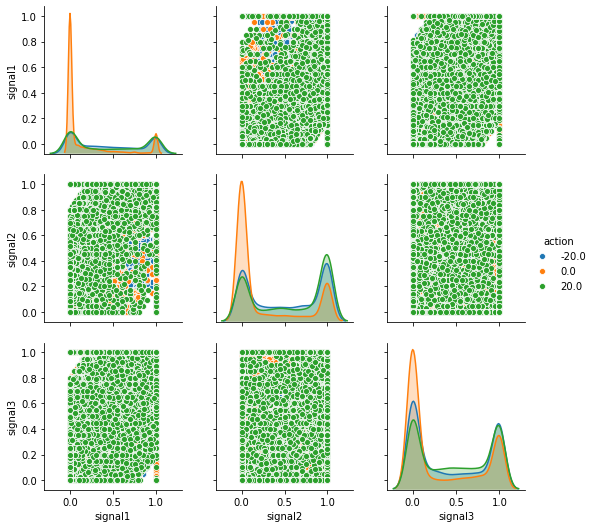

In [24]:
g = sns.pairplot(df, vars=['signal1', 'signal2', 'signal3'], hue='action')

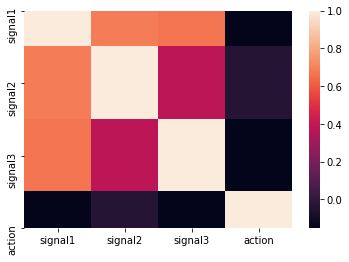

In [12]:
corr = df[['signal1', 'signal2', 'signal3','action']].corr()
sns.heatmap(corr)

In [17]:
df.groupby('experiment')['action'].value_counts()

experiment  action
1           -4         506
             0         271
            -19        233
             14        231
            -7         186
             20        184
            -1         124
            -11        100
            -15         78
            -6          61
             15         59
            -14         43
             13         43
             17         42
            -10         26
             7          19
             19         16
            -3          14
             10         13
             16         10
             18         10
            -8           9
             12          7
            -12          6
            -18          4
             6           3
            -5           2
            -20          1
2           -1         492
            -15        416
                      ... 
12          -7          15
             11         13
             1           2
            -20          1
            -5           1
         

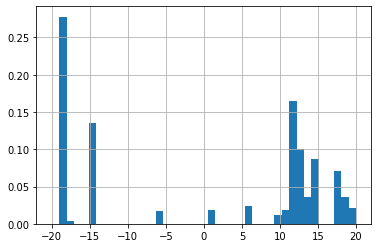

In [34]:
df[df['experiment'] == 15].action.hist(density=True, bins=41)

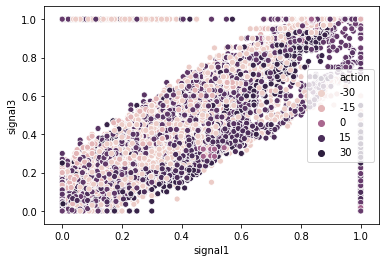

In [38]:
ax = sns.scatterplot(x="signal1", y="signal3", hue="action", data=df[df['experiment'] == 15])

In [40]:
df.action.describe()

count    220280.000000
mean         -0.008721
std          14.528143
min         -20.000000
25%         -15.000000
50%          -1.000000
75%          14.000000
max          20.000000
Name: action, dtype: float64

<IPython.core.display.Javascript object>


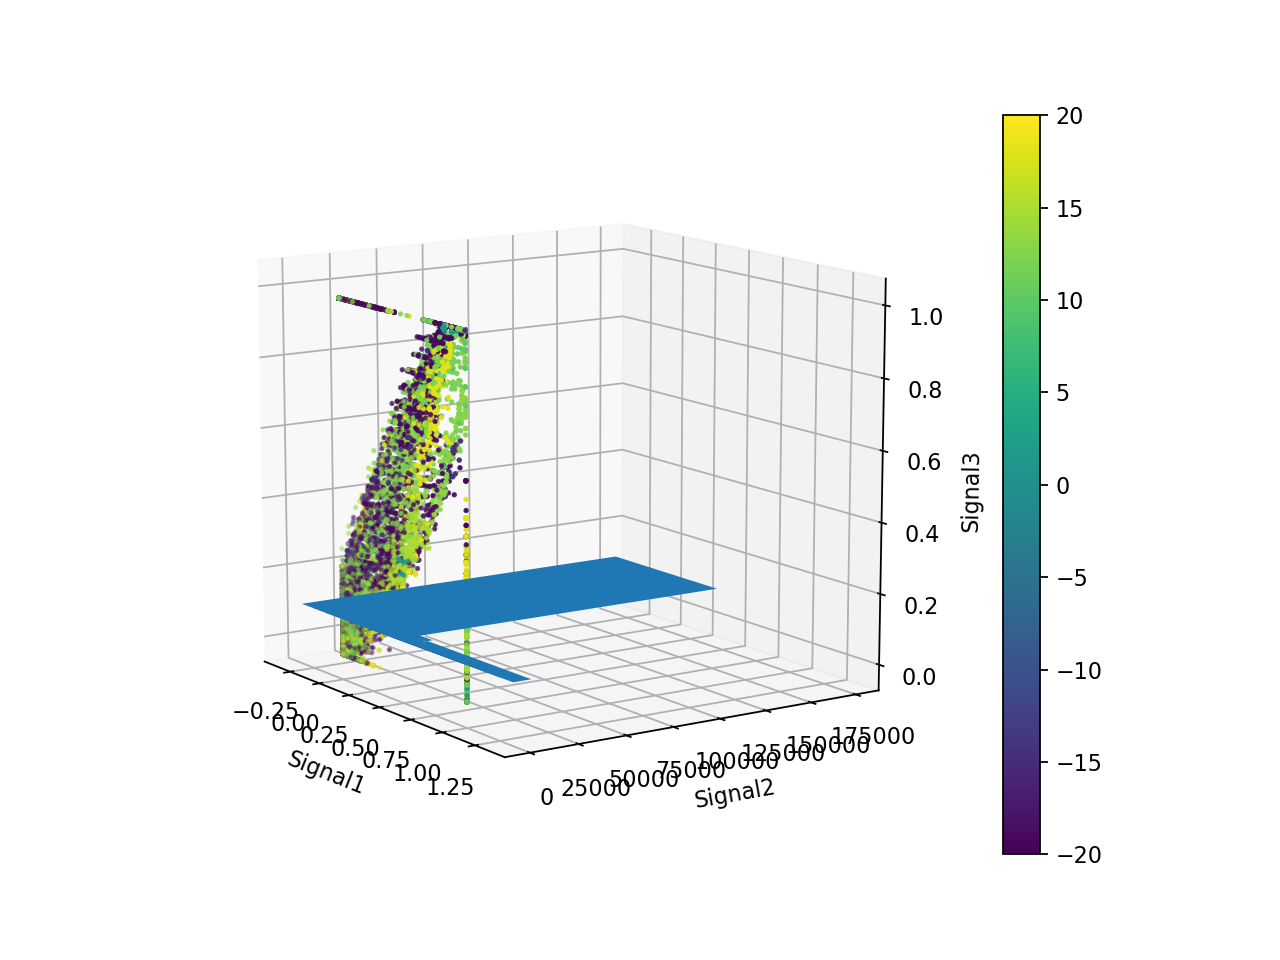

In [69]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
experiment = 15
x = df[df['experiment'] == experiment]['signal1']
y = df[df['experiment'] == experiment]['signal2']
z = df[df['experiment'] == experiment]['signal3']
c = df[df['experiment'] == experiment]['action']
ax.set_xlabel('Signal1')
ax.set_ylabel('Signal2')
ax.set_zlabel('Signal3')
p = ax.scatter(x, y, z, c=c, s = 2)
fig.colorbar(p)
plt.show()

In [70]:
df.signal1.hist()